#### Name:-          Sk Fardeen Hossain 
#### Enrollment ID:- 2021CSB023 
#### G-Suite ID:-    2021csb023.sk@students.iiests.ac.in

# Assignment 01

In [1]:
## install pandas dataframe library

!pip install pandas

## Question 01 / 02

In [2]:
import pandas as pd
TRAIN_DATASET_PATH = "../ML_DRIVE/Assignment01/train.csv"

houses_dataframe = pd.read_csv(TRAIN_DATASET_PATH)
houses_dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Estimate missing values in the dataframe 
First we will drop the columns having at least one 'NAN' value using the dropna() function.<br>
Here we will be using the interpolate() method provided by the pandas library to fill the missing values, method used will be forward average for equally spaced values

In [73]:
houses_dataframe=houses_dataframe.dropna(axis=1,thresh=500)
houses_dataframe=houses_dataframe.interpolate(method="linear", limit_direction="forward")
houses_dataframe.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

## Question 03

## Estimating Saleprice based on LotArea using Linear Regression

In [5]:
## Compress the data-frame into ['saleprice','lotarea']

sale_price_lot_area_df = houses_dataframe[['LotArea','SalePrice']]
sale_price_lot_area_df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


### Before Performing prediction for new values, we need to define our Linear Regression Model

We will import and use the sklearn library for this purpose

In [6]:
!pip install scikit-learn

Text(0, 0.5, 'SalePrice')

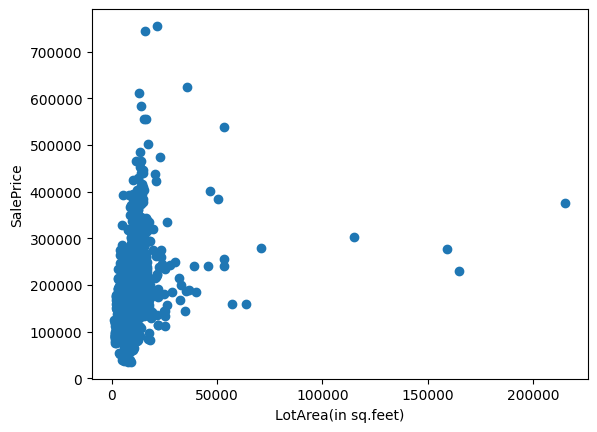

In [7]:
## Plot the saleprice vs lotarea
import matplotlib.pyplot as plt 
plt.scatter(x=sale_price_lot_area_df['LotArea'],y=sale_price_lot_area_df['SalePrice'])
plt.xlabel('LotArea(in sq.feet)')
plt.ylabel('SalePrice')

#### We can observe that the ranges of the X and Y axis are not same, so we can normalise the values of the saleprice and lotarea.


Text(0, 0.5, 'SalePrice')

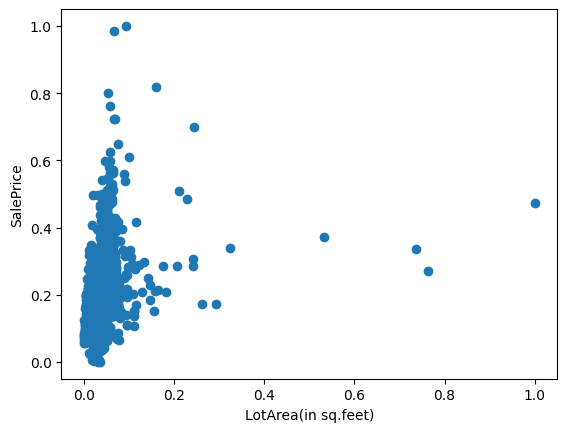

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## (x-mean)/(standard-deviation)
sale_price_lot_area_df=scaler.fit_transform(sale_price_lot_area_df)
sale_price_lot_area_df=pd.DataFrame(sale_price_lot_area_df,columns=['LotArea','SalePrice'])
plt.scatter(x=sale_price_lot_area_df['LotArea'],y=sale_price_lot_area_df['SalePrice'])
plt.xlabel('LotArea(in sq.feet)')
plt.ylabel('SalePrice')

### Implementing a utility K-fold cross validator for train-test split

In [39]:
# Here we will be considering 5 folds
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

## R2-Score = 1-( RSS/TSS ) ; RSS --> Residual Sum of Squares , TSS --> Total Sum of Squares
'''
    @brief:- Utility function to perform KfoldCross Validation on a dataset
    @param:- model - Estimator
             X_data - Independant Variable
             y_data - Dependant Variable

    @return:- Tuple of size 2, 1st being the average R2 score and the 2nd one being average MSE
'''

def Kfold_util(model,X_data,y_data):
    s_kfold = KFold(n_splits=5)
    model_r2_score = 0
    model_MSE_score = 0
    for i,(train_index,test_index) in enumerate(s_kfold.split(X_data,y_data)):
        print(f"Fold: {i+1}")
        model.fit(X_data[train_index],y_data[train_index])
        r2_score = model.score(X_data[test_index],y_data[test_index])
        y_pred = model.predict(X_data[test_index])
        MSE_score = mean_squared_error(y_data[test_index],y_pred)
        print(f"R2 score is: {r2_score} and MSE is: {MSE_score}")
        model_r2_score += r2_score
        model_MSE_score += MSE_score
    
    return (model_r2_score/5,model_MSE_score/5)

## Implement the model for Linear Regression

In [11]:
## Note since the y-values will be scaled we will not be using the scaled values for our model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = sale_price_lot_area_df[['LotArea']]
Y = sale_price_lot_area_df[['SalePrice']]

avg_r2_score,avg_MSE = Kfold_util(model,X_data=X.to_numpy(),y_data=Y.to_numpy())

print(f"Average R2-score is :- {avg_r2_score}")
print(f"Average MSE is :- {avg_MSE}")

Fold: 1
R2 score is: 0.0811255840664582 and MSE is: 5083791990.222536
Fold: 2
R2 score is: -0.09677051342182441 and MSE is: 7206516872.48441
Fold: 3
R2 score is: 0.09034415298115273 and MSE is: 6893188266.548201
Fold: 4
R2 score is: 0.04542629407540688 and MSE is: 4835731884.893979
Fold: 5
R2 score is: 0.06551930527251171 and MSE is: 6266038369.012835
Average R2-score is :- 0.03712896459474102
Average MSE is :- 6057053476.632393


#### Print the slope and intercept 

In [13]:
print(f'Saleprice = {model.coef_[0][0]}*LotArea + {model.intercept_[0]}')

Saleprice = 1.9554707455489049*LotArea + 160015.64126957097


## Question 04 / 05

In [14]:
## Meta-data checking for non-null vaues
houses_dataframe['LotFrontage'].info()
houses_dataframe['OverallQual'].info()
houses_dataframe['OverallCond'].info()
houses_dataframe['1stFlrSF'].info()
houses_dataframe['GrLivArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OverallQual
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: OverallCond
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: 1stFlrSF
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GrLivArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory us

### Model 1:- SalePrice based on LotFrontage and LotArea   

In [15]:
X_model1 = houses_dataframe[['LotArea','LotFrontage']]
Y_model1 = houses_dataframe[['SalePrice']]

model1 = LinearRegression()

model1_avg_r2_score,model1_avg_MSE = Kfold_util(model1,X_data=X_model1.to_numpy(),y_data=Y_model1.to_numpy())

print(f"Average R2-score of Model 1 is :- {model1_avg_r2_score}")
print(f"Average MSE of Model 1 is :- {model1_avg_MSE}")

Fold: 1
R2 score is: 0.16662248538019597 and MSE is: 4610769284.887944
Fold: 2
R2 score is: 0.06022044420881212 and MSE is: 6174981130.825078
Fold: 3
R2 score is: 0.12987082205255585 and MSE is: 6593663152.350717
Fold: 4
R2 score is: 0.052979792241372836 and MSE is: 4797466959.203123
Fold: 5
R2 score is: 0.0954056556554943 and MSE is: 6065639346.040892
Average R2-score of Model 1 is :- 0.10101983990768622
Average MSE of Model 1 is :- 5648503974.6615505


#### Print the slope and intercept 

In [16]:
print(f'Saleprice = {model1.coef_[0][0]}*LotArea + {model1.coef_[0][1]}*LotFrontage + {model1.intercept_[0]}')

Saleprice = 1.4451006676919291*LotArea + 963.9269485159833*LotFrontage + 97914.36673373333


### Model 2:- SalePrice based on LotFrontage, LotArea, OverallQual, OverallCond   

In [17]:
model2 = LinearRegression()

X_model2 = houses_dataframe[['LotArea','LotFrontage','OverallQual','OverallCond']]
Y_model2 = houses_dataframe[['SalePrice']]

model2_avg_r2_score,model2_avg_MSE = Kfold_util(model2,X_data=X_model2.to_numpy(),y_data=Y_model2.to_numpy())

print(f"Average R2-score of Model 2 is :- {model2_avg_r2_score}")
print(f"Average MSE of Model 2 is :- {model2_avg_MSE}")

Fold: 1
R2 score is: 0.7113617232553542 and MSE is: 1596928735.7894995
Fold: 2
R2 score is: 0.6575961773354837 and MSE is: 2249822451.4958005
Fold: 3
R2 score is: 0.6498657567034967 and MSE is: 2653246571.786378
Fold: 4
R2 score is: 0.6433965130847672 and MSE is: 1806501521.2943513
Fold: 5
R2 score is: 0.6227651796454086 and MSE is: 2529498866.9175787
Average R2-score of Model 2 is :- 0.6569970700049022
Average MSE of Model 2 is :- 2167199629.4567213


#### Print the slope and intercept 

In [18]:
print(f'Saleprice = {model2.coef_[0][0]}*LotArea + {model2.coef_[0][1]}*LotFrontage + {model2.coef_[0][2]}*OverallQual +{model2.coef_[0][3]}*OverallCond +{model2.intercept_[0]}')

Saleprice = 1.189847212962575*LotArea + 418.4665742151931*LotFrontage + 42994.96807363269*OverallQual +-867.0796471136888*OverallCond +-118705.73313785144


### Model 3:- SalePrice based on LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF and GrLivArea  

In [19]:
model3 = LinearRegression()

X_model3 = houses_dataframe[['LotArea','LotFrontage','OverallQual','OverallCond','1stFlrSF','GrLivArea']]
Y_model3 = houses_dataframe[['SalePrice']]

model3_avg_r2_score,model3_avg_MSE = Kfold_util(model3,X_data=X_model3.to_numpy(),y_data=Y_model3.to_numpy())

print(f"Average R2-score of Model 3 is :- {model3_avg_r2_score}")
print(f"Average MSE of Model 3 is :- {model3_avg_MSE}")

Fold: 1
R2 score is: 0.7879932254919686 and MSE is: 1172955001.7146173
Fold: 2
R2 score is: 0.7569992404082071 and MSE is: 1596677748.530303
Fold: 3
R2 score is: 0.7612416434303056 and MSE is: 1809262599.0810008
Fold: 4
R2 score is: 0.7326812554452906 and MSE is: 1354197971.775218
Fold: 5
R2 score is: 0.6423236527060292 and MSE is: 2398352077.7665286
Average R2-score of Model 3 is :- 0.7362478034963603
Average MSE of Model 3 is :- 1666289079.7735336


#### Print the slope and intercept 

In [20]:
print(f'Saleprice = {model3.coef_[0][0]}*LotArea + {model3.coef_[0][1]}*LotFrontage + {model3.coef_[0][2]}*OverallQual +{model3.coef_[0][3]}*OverallCond + {model3.coef_[0][4]}*1stFlrSF + {model3.coef_[0][5]}*GrLivArea +{model3.intercept_[0]}')

Saleprice = 0.6505447246251344*LotArea + 121.80300773461254*LotFrontage + 29613.59960437697*OverallQual +1309.826685552478*OverallCond + 38.79274996548665*1stFlrSF + 45.046292101878805*GrLivArea +-135266.21756742758


## Question  06

## Categorical Value Regression

### Model 4:- SalePrice based on LotArea and Street 

In [9]:
street_set = set(houses_dataframe['Street'])
street_set

{'Grvl', 'Pave'}

#### Since we have two values for the `Street` feature we can consider a numpy array as a one-hot encoded input feature for estimating `SalePrice`

In [21]:
## Utility One Hot Encoder

from sklearn.preprocessing import OneHotEncoder

'''
    @brief:- Function transforms the dataframe by converting the categorical value cols into one-hot encoded form
    @param:- X: Dataframe, col_name:- Categorical Column name
    @return:- Transformed DataFrame
'''
def one_hot_encoder(X,col_name):
    encoder = OneHotEncoder()

    new_df = pd.DataFrame(
        encoder.fit_transform(X[[col_name]]).toarray(),
        columns = encoder.get_feature_names_out()
    )

    X = X.join(new_df)
    X = X.drop(col_name,axis=1) # drop the col_name from the dataframe

    return X

In [22]:
houses_dataframe_pd1 = one_hot_encoder(houses_dataframe,'Street')
houses_dataframe_pd1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,0.0,1.0
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,0.0,1.0
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,0.0,1.0
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,0.0,1.0
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,0.0,1.0


In [23]:
## Street_Grvl and Street_Pave are the two transformed col values
model4 = LinearRegression()

X_model4 = houses_dataframe_pd1[['LotArea','Street_Grvl','Street_Pave']]
Y_model4 = houses_dataframe_pd1[['SalePrice']]

model4_avg_r2_score,model4_avg_MSE = Kfold_util(model4,X_data=X_model4.to_numpy(),y_data=Y_model4.to_numpy())

print(f"Average R2-score of Model 4 is :- {model4_avg_r2_score}")
print(f"Average MSE of Model 4 is :- {model4_avg_MSE}")

Fold: 1
R2 score is: 0.08083987276169624 and MSE is: 5085372725.1058655
Fold: 2
R2 score is: -0.06216483704535136 and MSE is: 6979134400.3638525
Fold: 3
R2 score is: 0.102774623160658 and MSE is: 6798992674.369186
Fold: 4
R2 score is: 0.056929075521841566 and MSE is: 4777460463.1480665
Fold: 5
R2 score is: 0.06650223035586045 and MSE is: 6259447493.116865
Average R2-score of Model 4 is :- 0.04897619295094098
Average MSE of Model 4 is :- 5980081551.220767


#### Print the slope and intercept 

In [24]:
print(f'Saleprice = {model4.coef_[0][0]} * LotArea + {model4.coef_[0][1]} * Street_Grvl + {model4.coef_[0][2]} * Street_Pave + {model4.intercept_[0]}')

Saleprice = 2.110142385499554 * LotArea + -64695.324094630705 * Street_Grvl + 64695.32409463071 * Street_Pave + 94246.82591973609


### Model 5 :- SalePrice based on LotArea, OverallCond, Street, Neighbourhood

In [25]:
houses_dataframe[['LotArea','OverallCond','Neighborhood']]

,LotArea,OverallCond,Neighborhood
0,8450,5,CollgCr
1,9600,8,Veenker
2,11250,5,CollgCr
3,9550,5,Crawfor
4,14260,5,NoRidge
...,...,...,...
1455,7917,5,Gilbert
1456,13175,6,NWAmes
1457,9042,9,Crawfor
1458,9717,6,NAmes


Neighbourhood is another categorical value that needs to be one-hot encoded

In [26]:
print(len(set(houses_dataframe['Neighborhood'])))

25


In [27]:
houses_dataframe_pd2 = one_hot_encoder(houses_dataframe,'Street')
houses_dataframe_pd2 = one_hot_encoder(houses_dataframe_pd2,'Neighborhood')
houses_dataframe_pd2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
neighborhood_cols = houses_dataframe_pd2.filter(regex='^Neighborhood_')
neighborhood_cols.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
houses_dataframe_pd2 = pd.concat([houses_dataframe_pd2[['LotArea','OverallCond','Street_Grvl','Street_Pave']],neighborhood_cols],axis=1)
houses_dataframe_pd2.head()

,LotArea,OverallCond,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,8450,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9600,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11250,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9550,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14260,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
model5 = LinearRegression()

X_model5 = houses_dataframe_pd2
Y_model5 = houses_dataframe_pd1[['SalePrice']]

model5_avg_r2_score,model5_avg_MSE = Kfold_util(model5,X_data=X_model5.to_numpy(),y_data=Y_model5.to_numpy())

print(f"Average R2-score of Model 5 is :- {model5_avg_r2_score}")
print(f"Average MSE of Model 5 is :- {model5_avg_MSE}")

Fold: 1
R2 score is: 0.5841021043157792 and MSE is: 2301009097.833854
Fold: 2
R2 score is: 0.5261617473778633 and MSE is: 3113434688.9909825
Fold: 3
R2 score is: 0.5665378038610315 and MSE is: 3284688966.9422917
Fold: 4
R2 score is: 0.5250330812935398 and MSE is: 2406113492.1310244
Fold: 5
R2 score is: 0.545123175604145 and MSE is: 3050117194.4170914
Average R2-score of Model 5 is :- 0.5493915824904716
Average MSE of Model 5 is :- 2831072688.0630484


### Model 6 :- SalePrice based on LotArea, OverallCond, Street, 1stFlrSF, Neighbourhood, Year

In [31]:
houses_dataframe.columns

## Hmm `Year` is not there but we can use the continuous values of YrSold, YearBuilt and YearRemodAdd

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [32]:
houses_dataframe_pd3 = houses_dataframe_pd2
houses_dataframe_pd3 = pd.concat([houses_dataframe_pd3,houses_dataframe[['1stFlrSF','YearBuilt','YearRemodAdd','YrSold']]],axis=1)
houses_dataframe_pd3.head()

,LotArea,OverallCond,Street_Grvl,Street_Pave,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,1stFlrSF,YearBuilt,YearRemodAdd,YrSold
0,8450,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,856,2003,2003,2008
1,9600,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1262,1976,1976,2007
2,11250,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,920,2001,2002,2008
3,9550,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,961,1915,1970,2006
4,14260,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1145,2000,2000,2008


In [33]:
model6 = LinearRegression()

X_model6 = houses_dataframe_pd3
Y_model6 = houses_dataframe_pd1[['SalePrice']]

model6_avg_r2_score,model6_avg_MSE = Kfold_util(model6,X_data=X_model6.to_numpy(),y_data=Y_model6.to_numpy())

print(f"Average R2-score of Model 6 is :- {model6_avg_r2_score}")
print(f"Average MSE of Model 6 is :- {model6_avg_MSE}")

Fold: 1
R2 score is: 0.7095584627129405 and MSE is: 1606905508.8314323
Fold: 2
R2 score is: 0.7138242036094097 and MSE is: 1880366658.2457325
Fold: 3
R2 score is: 0.6985593789138491 and MSE is: 2284256138.342621
Fold: 4
R2 score is: 0.6829225245459274 and MSE is: 1606268482.484338
Fold: 5
R2 score is: 0.6451907294515968 and MSE is: 2379127268.740516
Average R2-score of Model 6 is :- 0.6900110598467447
Average MSE of Model 6 is :- 1951384811.328928


## Question 07

### Comparison of the feature “LotArea” weights/coefficients for all the six trained models

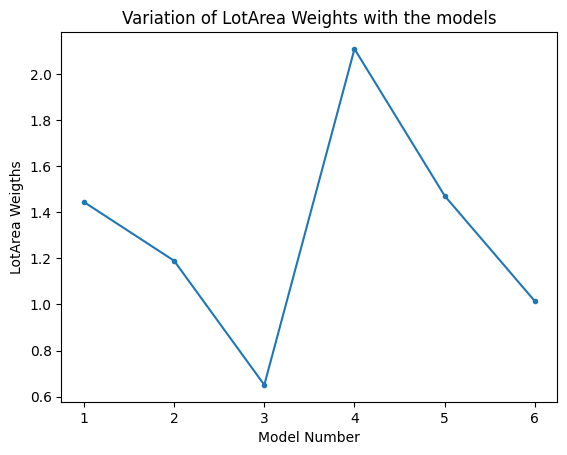

In [35]:
x_axis = range(1,7)
lot_area_weights = [model1.coef_[0][0],model2.coef_[0][0],model3.coef_[0][0],model4.coef_[0][0],model5.coef_[0][0],model6.coef_[0][0]]

plt.plot(x_axis,lot_area_weights,".-")
plt.xlabel("Model Number")
plt.ylabel("LotArea Weigths")
plt.title("Variation of LotArea Weights with the models")
plt.show()

## Question 08

### Bonus - Using Polynomial Regression for predicting `SalePrice` based on `LotArea` and applying it on the training and test dataset

Fold: 1
R2 score is: 0.0811255840664582 and MSE is: 5083791990.222536
Fold: 2
R2 score is: -0.09677051342182441 and MSE is: 7206516872.48441
Fold: 3
R2 score is: 0.09034415298115273 and MSE is: 6893188266.548201
Fold: 4
R2 score is: 0.04542629407540688 and MSE is: 4835731884.893979
Fold: 5
R2 score is: 0.06551930527251171 and MSE is: 6266038369.012835
Fold: 1
R2 score is: 0.1880996406892882 and MSE is: 4491944135.074409
Fold: 2
R2 score is: -0.13326083373331588 and MSE is: 7446282717.562326
Fold: 3
R2 score is: 0.17210416157128516 and MSE is: 6273627436.226067
Fold: 4
R2 score is: 0.08756692413546696 and MSE is: 4622253567.644948
Fold: 5
R2 score is: 0.10154612807937147 and MSE is: 6024465209.401183
Fold: 1
R2 score is: 0.21551510546124142 and MSE is: 4340264517.273444
Fold: 2
R2 score is: -0.15932525137145825 and MSE is: 7617543398.973908
Fold: 3
R2 score is: 0.18848183298735877 and MSE is: 6149520750.374883
Fold: 4
R2 score is: 0.08050638806129573 and MSE is: 4658021218.90792
Fold: 5

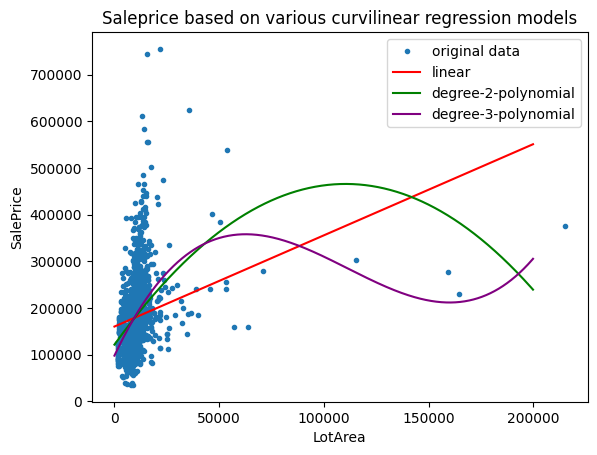

In [52]:
sale_price = houses_dataframe[['SalePrice']]
lot_area = houses_dataframe[['LotArea']]
plt.plot(lot_area,sale_price,'.',label="original data")

## define a domain
x_axis = range(0,200000,200)

## Linear Model (degree 1)

linear_model_degree_1 = LinearRegression()
X_data_1 = lot_area[['LotArea']]
Y_data_1 = sale_price[['SalePrice']]
Kfold_util(linear_model_degree_1,X_data_1.to_numpy(),Y_data_1.to_numpy())
linear_model_equation = [linear_model_degree_1.coef_[0][0]*x + linear_model_degree_1.intercept_[0] for x in x_axis]
plt.plot(x_axis,linear_model_equation,'red',label='linear')

curve_model_degree_2 = LinearRegression()
X_data_2 = X_data_1
X_data_2[['LotArea_squared']]=X_data_1[['LotArea']]**2
Y_data_2 = Y_data_1
Kfold_util(curve_model_degree_2,X_data_2.to_numpy(),Y_data_2.to_numpy())
curve_model_2_equation = [curve_model_degree_2.coef_[0][0]*x + curve_model_degree_2.coef_[0][1]*(x**2) + curve_model_degree_2.intercept_[0] for x in x_axis]
plt.plot(x_axis,curve_model_2_equation,'green',label='degree-2-polynomial')

curve_model_degree_3 = LinearRegression()
X_data_3 = X_data_2
X_data_3[['LotArea_cubed']] = X_data_1[['LotArea']]**3
Y_data_3 = Y_data_2
Kfold_util(curve_model_degree_3,X_data_3.to_numpy(),Y_data_3.to_numpy())
curve_model_3_equation = [curve_model_degree_3.coef_[0][0]*x + curve_model_degree_3.coef_[0][1]*(x**2) + curve_model_degree_3.coef_[0][2]*(x**3) + curve_model_degree_3.intercept_[0] for x in x_axis]
plt.plot(x_axis,curve_model_3_equation,'purple',label='degree-3-polynomial')

plt.title("Saleprice based on various curvilinear regression models")
plt.legend()
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [74]:
TEST_DATA_PATH = "../ML_DRIVE/Assignment01/test.csv"

test_df = pd.read_csv(TEST_DATA_PATH)
X_data = test_df[['LotArea']]


## Linear Model Prediction
test_df[['Linear_SalePrice']] = linear_model_degree_1.predict(X_data.to_numpy())

X_data_2 = X_data
X_data_2[['LotArea_squared']] = X_data[['LotArea']]**2

## Quadratic Model Prediction 
test_df[['Quadratic_SalePrice']] = curve_model_degree_2.predict(X_data_2.to_numpy())

X_data_3 = X_data_2
X_data_3[['LotArea_cubed']] = X_data[['LotArea']]**3

## Cubic Model Prediction 
test_df[['Cubic_SalePrice']] = curve_model_degree_3.predict(X_data_3.to_numpy())
test_df[['Linear_SalePrice','Quadratic_SalePrice','Cubic_SalePrice']]

,Linear_SalePrice,Quadratic_SalePrice,Cubic_SalePrice
0,182742.122274,189993.344744,194862.710030
1,187914.342396,204567.098660,213283.237485
2,187059.801681,202186.557959,210330.004739
3,179527.328369,180735.550583,182745.955495
4,169802.772351,151800.366145,142881.730423
...,...,...,...
1454,163801.432633,133245.300499,115795.352440
1455,163719.302862,132987.673554,115411.178384
1456,199125.056181,234796.704797,248815.620205
1457,180432.711324,183358.293784,186210.825113
